In [2]:
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBoxesOnImage as bb_on_image
from matplotlib import pyplot as plt
import cv2
%matplotlib inline
import os

In [3]:
def get_bbox_from_file(label_file):
    labels = [f.strip() for f in open(label_file).readlines()]    
    my_bbs = []
    for label in labels:
        label_content = label.split(' ')
        label_class = label_content[0]
        label_box = np.array(label_content[1:]).astype(np.float64)
        bbox = ia.BoundingBox(x1=label_box[0], y1=label_box[1], x2=label_box[2], y2=label_box[3], label=label_class)
        my_bbs.append(bbox)
    return my_bbs

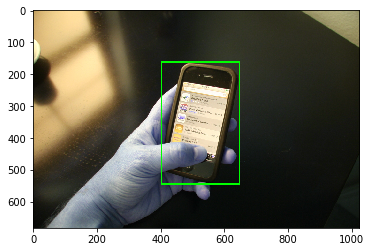

In [4]:
file_name = '0a4244f8a9185bad'
bbox = get_bbox_from_file('test_aug/' + file_name + '.txt')
img = cv2.imread('test_aug/' + file_name + '.jpg')
img_with_box = bb_on_image(bbox, shape=img.shape).draw_on_image(img, size=5)
plt.imshow(img_with_box)

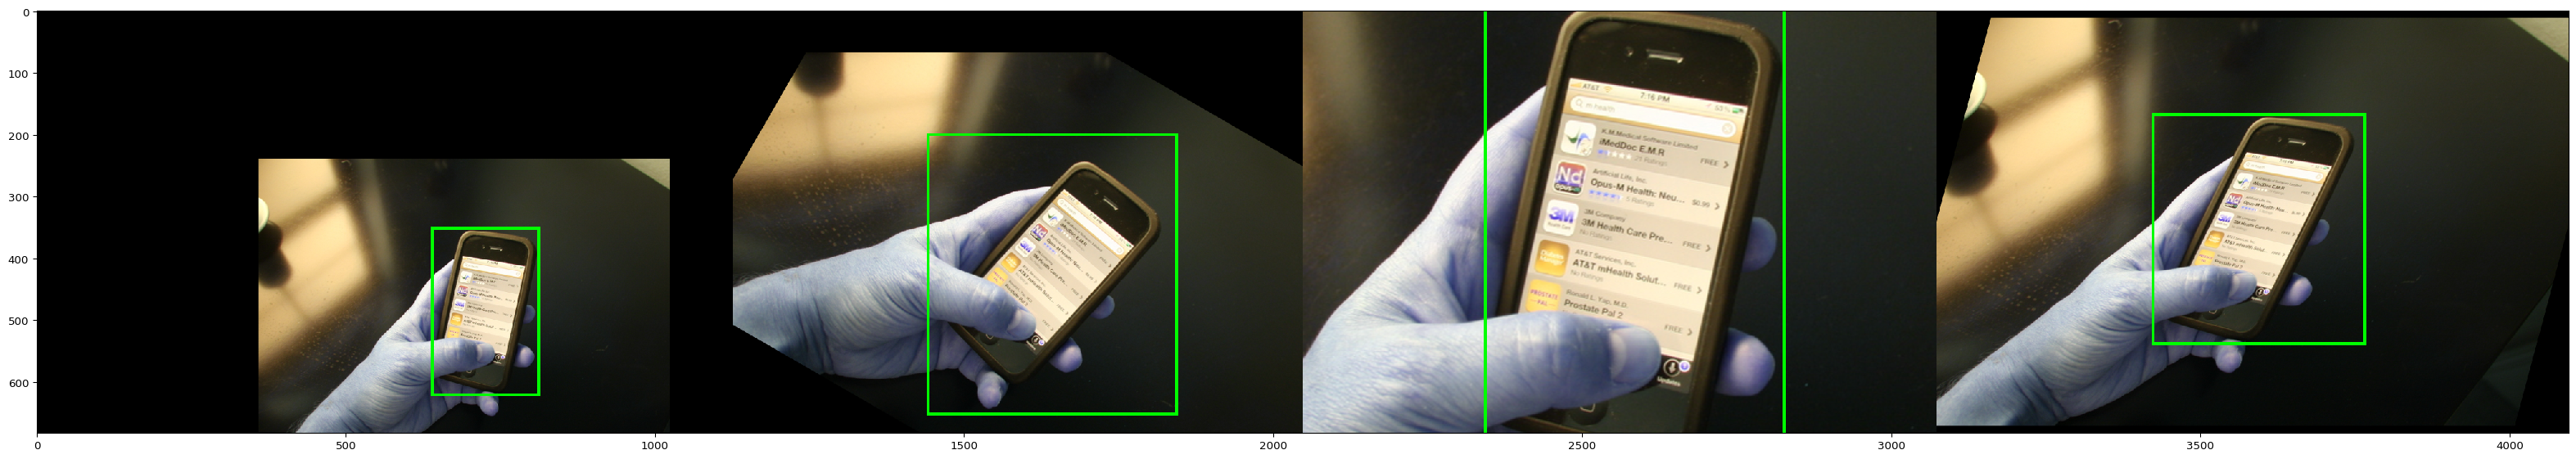

In [8]:
# Affine Augmenters

augmenters = [
    [iaa.Affine(scale=(0.7)), iaa.Affine(translate_percent=(0.2))], # zufällig zwischne +/- 30% in x/y richtung verschieben
    [iaa.Affine(rotate=(30)), iaa.Affine(translate_percent=(0.1))], # zufällig um +/- 30grad rotieren
    [iaa.Affine(scale=(2))], # zwischne 0.5fach und 2 fach zoomen
    [iaa.Affine(shear=15)] # 
]

img_aug_with_box = []

for i, augmenter in enumerate(augmenters):
    seq = iaa.Sequential(augmenter)
    img_aug, bbox_aug = seq(images=[img], bounding_boxes=[bbox])
    img_aug_with_box.append(bb_on_image(bbox_aug[0], shape=img_aug[0].shape).draw_on_image(img_aug[0], size=5))
    

img_aug_with_box = np.array(img_aug_with_box)
img_aug_with_box = np.hstack(img_aug_with_box)
img_all_with_box = np.hstack((img_with_box, img_aug_with_box))
ia.imshow(img_aug_with_box)

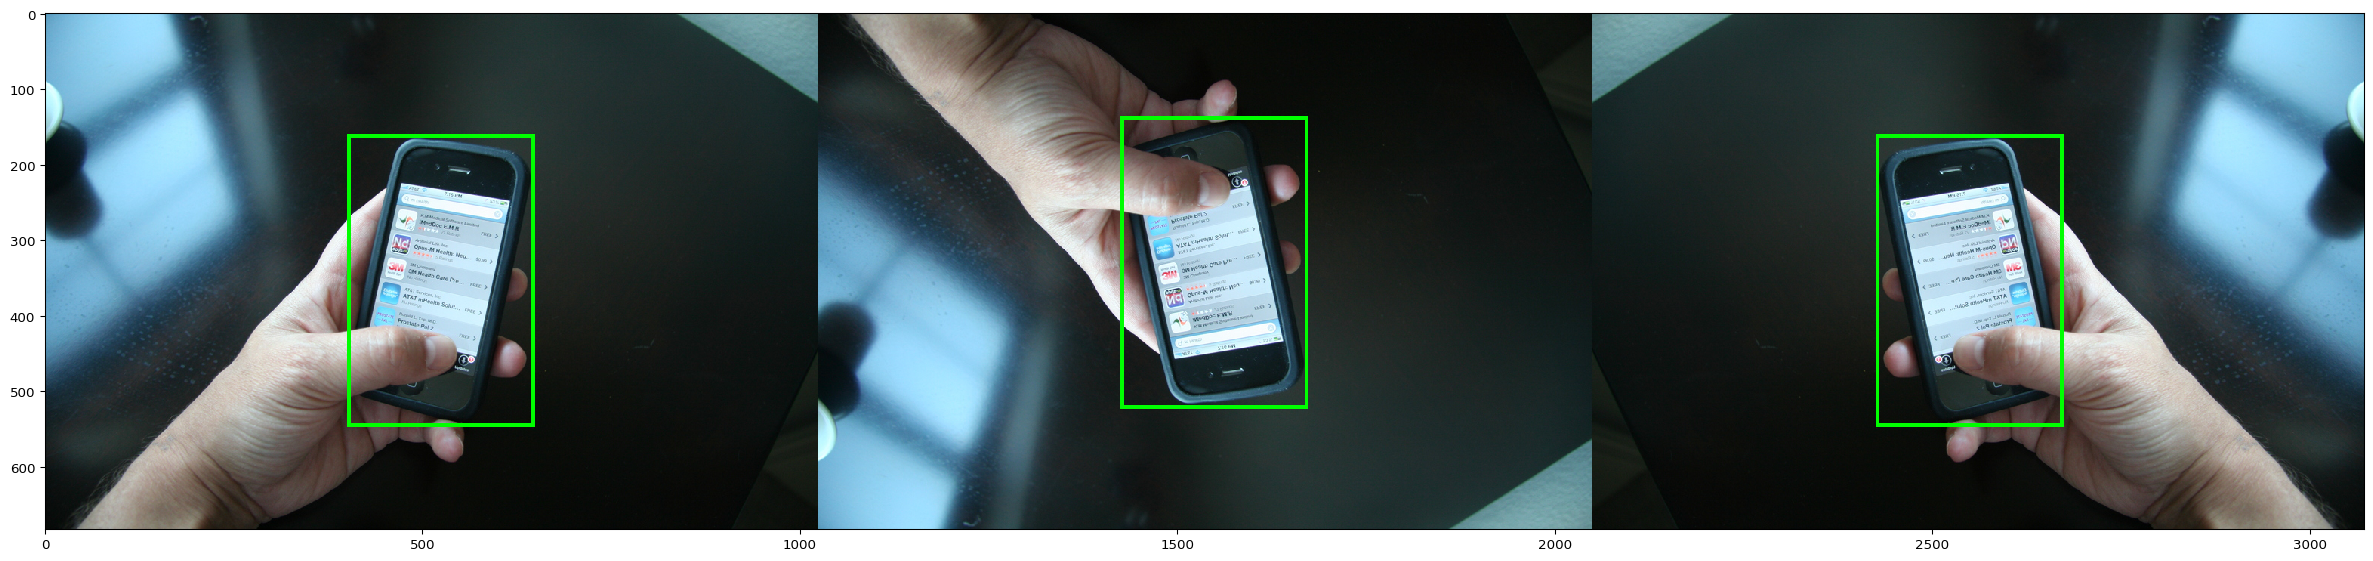

In [137]:
# sonstige 

augmenters = [
    [iaa.Flipud(1)], # vertical flip
    [iaa.Fliplr(1)], # horizontal flip
]

img_aug_with_box = []

for i, augmenter in enumerate(augmenters):
    seq = iaa.Sequential(augmenter)
    img_aug, bbox_aug = seq(images=[img], bounding_boxes=[bbox])
    img_aug_with_box.append(bb_on_image(bbox_aug[0], shape=img_aug[0].shape).draw_on_image(img_aug[0], size=5))
    

img_aug_with_box = np.array(img_aug_with_box)
img_aug_with_box = np.hstack(img_aug_with_box)
img_all_with_box = np.hstack((img_with_box, img_aug_with_box))
ia.imshow(img_all_with_box)